In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 


df = pd.read_csv('Imputed_Cleaned_CDX.csv').drop('Unnamed: 0', axis=1)
warnings.filterwarnings('ignore')

In [78]:
df.columns

Index(['Date', 'SPX Index ', 'VIX Index  (L1)',
       'Freddie Mac 30 Year Mortgage Rate',
       'U.S. 5-year Treasury constant maturity rate', 'CDX HY Spread',
       'CDX IG Spread'],
      dtype='object')

*Shorten Column names to Features Identified in Charter*

In [79]:
df = df.rename({'SPX Index ': 'SPX Index', 'VIX Index  (L1)':'VIX Index', 'Freddie Mac 30 Year Mortgage Rate': '30 YR Mort',
           'U.S. 5-year Treasury constant maturity rate': '5 YR Mat'}, axis=1)

df.columns

Index(['Date', 'SPX Index', 'VIX Index', '30 YR Mort', '5 YR Mat',
       'CDX HY Spread', 'CDX IG Spread'],
      dtype='object')

In [80]:
ig_df = df.drop(labels=['Date', 'CDX HY Spread'], axis=1)

features = ['SPX Index', 'VIX Index', '30 YR Mort', '5 YR Mat']

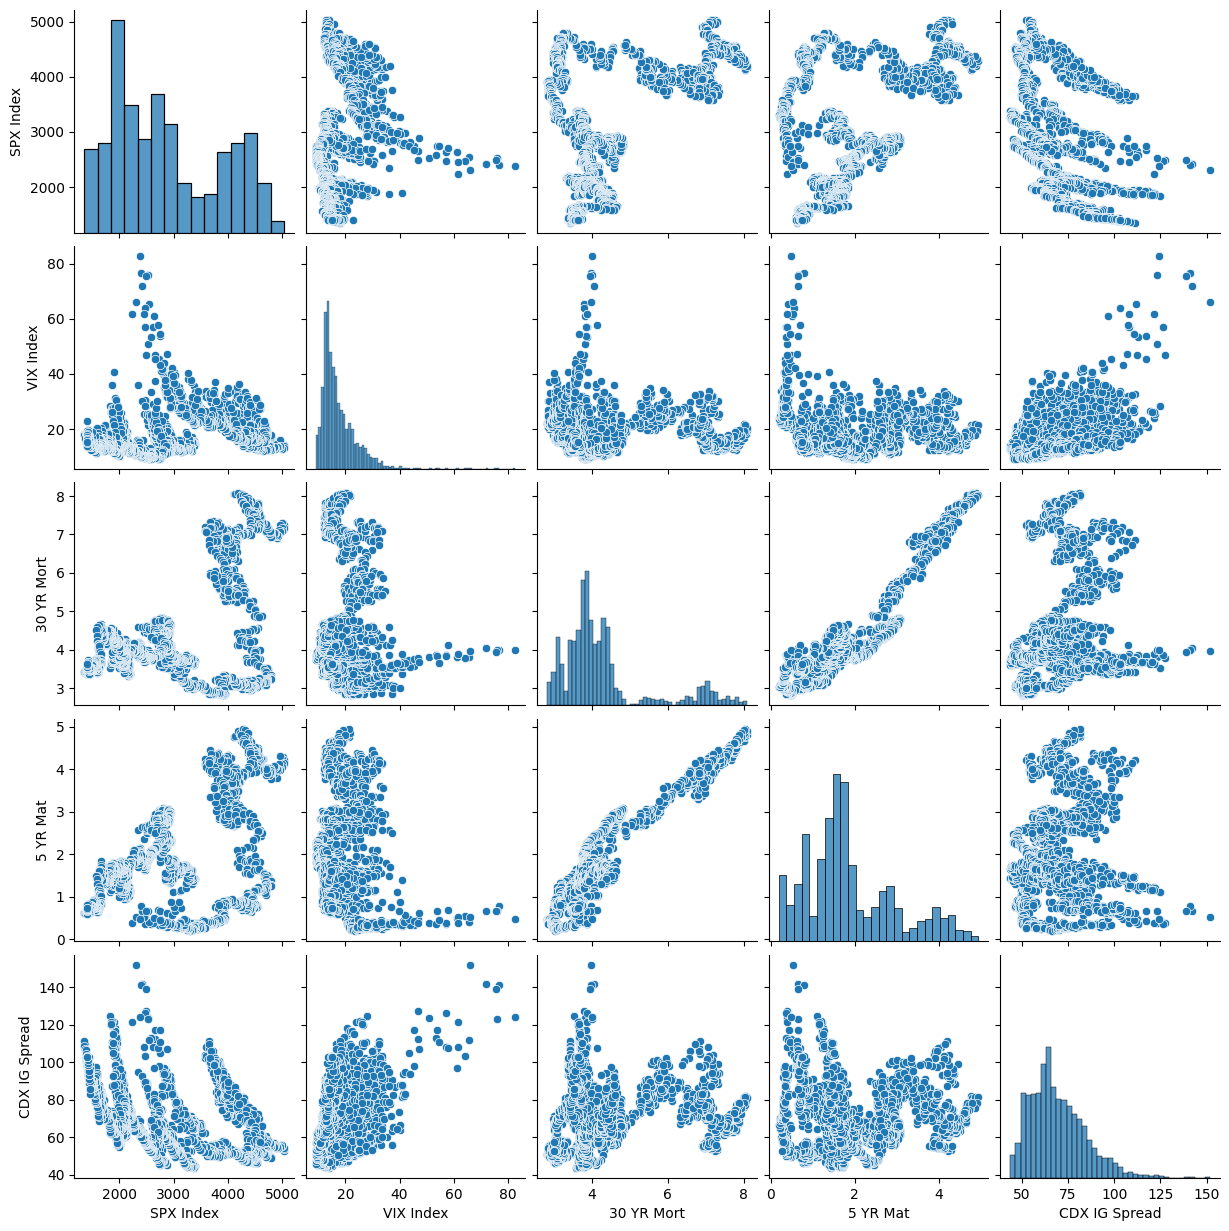

In [81]:
sns.pairplot(ig_df)
plt.show()

*Mortgage Rate and Interest Rate have a strong correlation implying multicollinearity between features when predicting the IG Target.*

*Outside of VIX, no of the features appear to be great indicators of CDX IG at this point. We likely need more features to build a better model. Let's explore HY Correlation next*

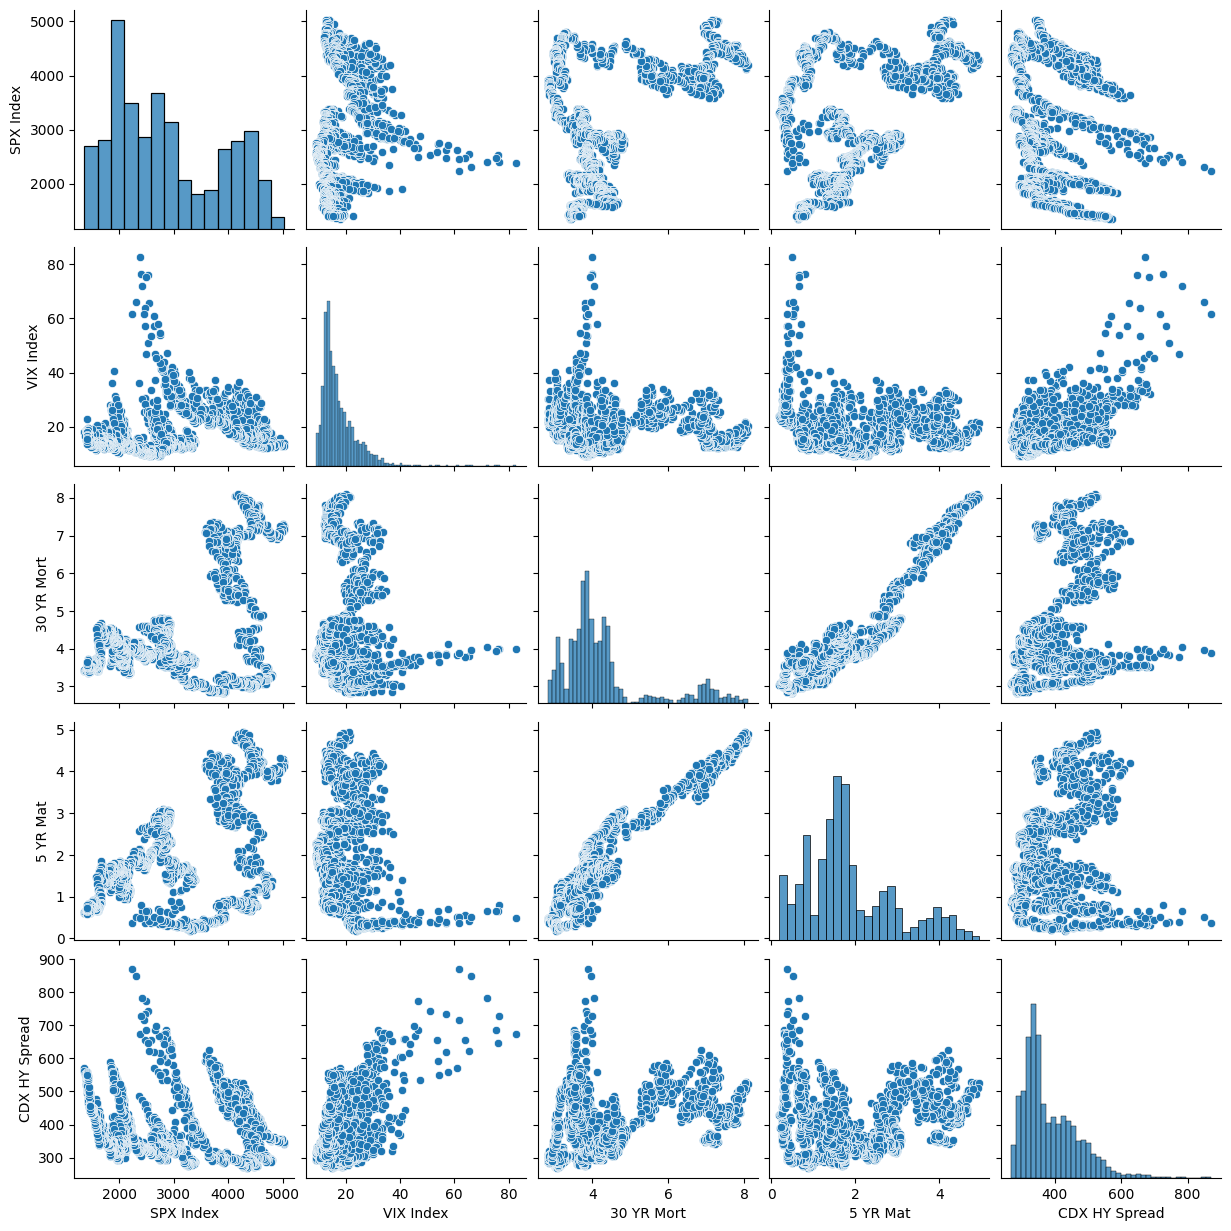

In [82]:
hy_df = df.drop(labels=['Date', 'CDX IG Spread'], axis=1)

sns.pairplot(hy_df)

plt.show()

*The targets are positively correlated as this matrix looks very similar to the IG*

In [83]:
import numpy as np

r_dict= {}

targets = ['CDX IG Spread', 'CDX HY Spread']

for target in targets: 
    r_dict[target] = {}
    for feature in features:
        correlation_matrix = np.corrcoef(df[feature], df[target])
        correlation_xy = correlation_matrix[0,1]
        r_dict[target][feature] = correlation_xy**2

In [84]:
r_dict

{'CDX IG Spread': {'SPX Index': 0.11793113273693956,
  'VIX Index': 0.18841572422944283,
  '30 YR Mort': 0.03692700452136573,
  '5 YR Mat': 0.00039657775174385435},
 'CDX HY Spread': {'SPX Index': 0.0023533050998523182,
  'VIX Index': 0.3130295068317687,
  '30 YR Mort': 0.12700667894304507,
  '5 YR Mat': 0.0270802387257824}}

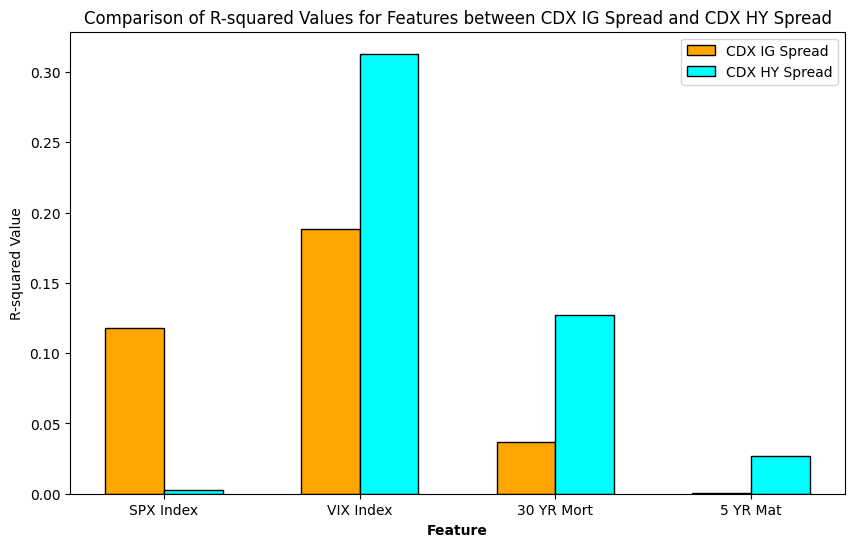

In [85]:
ig_spread_r2 = [r_dict['CDX IG Spread'][feature] for feature in features]
hy_spread_r2 = [r_dict['CDX HY Spread'][feature] for feature in features]

barWidth = 0.3

r1 = np.arange(len(ig_spread_r2))
r2 = [x + barWidth for x in r1]

plt.figure(figsize=(10, 6))
plt.bar(r1, ig_spread_r2, color='orange', width=barWidth, edgecolor='black', label='CDX IG Spread')
plt.bar(r2, hy_spread_r2, color='aqua', width=barWidth, edgecolor='black', label='CDX HY Spread')

plt.xlabel('Feature', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(ig_spread_r2))], features)
plt.ylabel('R-squared Value')
plt.title('Comparison of R-squared Values for Features between CDX IG Spread and CDX HY Spread')

plt.legend()
plt.show()

*The VIX Index is best correlated with the Higher Volality CDX while the SPX Index is better correlated with the Lower Vol, Lower Risk Index. However, more features will be appended.*